# Recommender System Documentation Notebook


#### Prepared by: Chirag Shah


## A brief Walkthrough:
The Dataset that was provided i.e. movie.json contains product reviews and metadata from Amazon. This dataset includes reviews (ratings, text, helpfulness votes), product metadata (descriptions, category information, price, brand, and image features), and links (also viewed/also bought graphs).

The first approach here is to study the dataset and build a basic recommender system which is _Item-based_.

The dataset on further exploration on Amazon's official site, brief us what each columns relate the information to i.e.:  
-  __reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
-  __asin - ID of the product, e.g. 0000013714
-  __reviewerName - name of the reviewer
-  __helpful - helpfulness rating of the review, e.g. 2/3
-  __reviewText - text of the review
-  __overall - rating of the product
-  __summary - summary of the review
-  __unixReviewTime - time of the review (unix time)
-  __reviewTime - time of the review (raw)

A sample review of this movie. json file is as below:
> {
  "reviewerID": "A2SUAM1J3GNN3B",
  "asin": "0000013714",
  "reviewerName": "J. McDonald",
  "helpful": [2, 3],
  "reviewText": "I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!",
  "overall": 5.0,
  "summary": "Heavenly Highway Hymns",
  "unixReviewTime": 1252800000,
  "reviewTime": "09 13, 2009"
}
> 






## Building the Code:

We have used standard numpy and pandas for implmentations. 
Read the JSON file in this way: 
> json_movie=pd.read_json('movie.json')
> filter_json_movie = json_movie[['reviewerID','asin','overall']]
> filter_json_movie.to_csv('movies.csv',index=False)

But somehow in my given configuartions of Laptop, this was taking more than 5 mins to execute so I managed to extract it CSV on another machine and further we use this CSV file for entire implemenation.

### <font color=red>Note: Only JSON to CSV is converted once, if we are changing dataset, then JSON to CSV is needed and uncomment that from the code.</font>


After reading the movie.csv file, we create a data frame that gives number of rating and mean overall score foreach product. 
> ratings = pd.DataFrame(df.groupby('asin')['overall'].mean())
> ratings['number_of_ratings'] = df.groupby('asin')['overall'].count()

Using some matlab graph libraries just on initial stages, and futher exploring data as below:
> #ratings['overall'].hist(bins=50)
> #ratings['number_of_ratings'].hist(bins=60)
> #sns.jointplot(x='overall', y='number_of_ratings', data=ratings)
> #movie_matrix = pd.pivot_table(train, index='reviewerID', columns='asin', values='overall',aggfunc=np.mean)

We obtain three graphs which tells us a lot about this dataset.


Average Rating that all the user have given: 

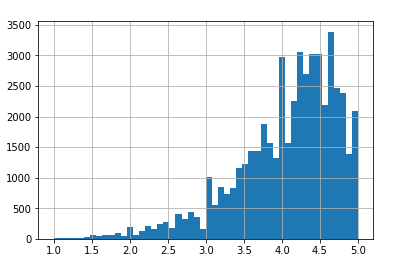


Overall ratings that users have given: 
    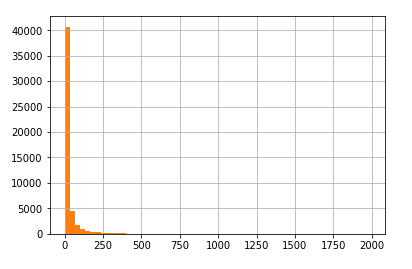

No. of ratings vs. Average rating a product has got:
    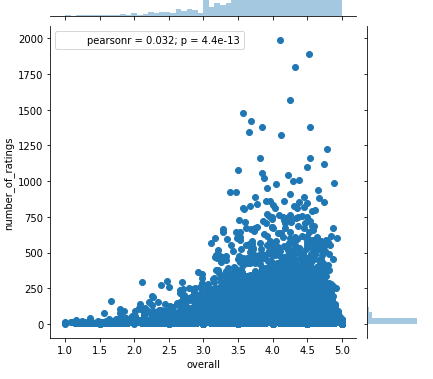

Here, we observe that the based on the number of ratings a product has got, shows more consistent rating it has got.
Based on this observation, we can observe that products below 250 are less sparse and majorly are rated between 2.0 to 5.0. It is 
also possible that a product has got rating 5.0 but just by one person. Hence, just ratings are meaning less. 

## Data Filtering Approach : (In adjunct with Mansoor Abbas Ali) 
>  So on observation we want to focus on products that has got more no. of ratings,even it has less ratings. 
>  Our focus is on Recommendations, so we set some threshold value, to see what performance we get with different thresholds.

### First Appraoch - Item based Recommendation System
 In this approach we are calculating Pivot table after the filtered data. And then we split the data in to 80% train and 20% test. 
 
> df_Filtered = df_Merged[df_Merged.totalReviewers >= 180]

> movie_matrix = pd.pivot_table(df_Filtered, index='reviewerID_x', columns='asin', values='overall_x')

> train, test = train_test_split(movie_matrix, test_size=0.2)


On getting the top 10 products which have got more no of ratings by the user:


 asin         overall        number_of_ratings
##B003EYVXV4  4.108816               1985
##B001KVZ6HK  4.524364               1888
##B009934S5M  4.317601               1801
##B0059XTU1S  4.254777               1570
##B005LAIHXQ  3.565541               1480
##B005LAIIMG  3.691063               1421
##B00AF6B22E  3.843705               1382
##B00FZM8Z7I  4.546512               1376
##B00H83EUL2  3.665175               1341
##B002VPE1AW  4.115385               1326


We see that product "B003EYVXV4" has got highest no. of ratings. 
#### So this gives us hint, that why don't we predict predictions of items for other users which are similar to this top 10 products.

#### Basically, in our Recommendation System we are considering this top 10 products and are trying to predict relevant predictions for test data users and then,  "find error between the actual rating that the user had and what has been predicted".

### Experiment : 1  {Keeping threshold= 180(total_no_ratings) }
Output(Snippet):

User: AXPMHNK0WWKNB
Prediction:  4.999999999999996
Actual:  4.0
Error:  0.9999999999999956

User: A3F9VH8916IA40
Prediction:  3.8126415344525637
Actual:  2.0
Error:  1.8126415344525637

...
...

User: A2S9B3JVS9T55S
Prediction:  4.619639492543787
Actual:  3.0
Error:  1.6196394925437874

User: A18IVVB3CAJ6AE
Prediction:  5.0
Actual:  3.0
Error:  2.0

User: A1EHDYSSAO2Y1J
Prediction:  0
Actual:  3.0
Error:  -3.0

User: A3N0OINVM9NVB2
Prediction:  4.241053398149585
Actual:  5.0
Error:  -0.7589466018504147

> __Item-based recommender MAE:  1.2687502459658906 


### Experiment : 2  {Keeping threshold= 250(total_no_ratings) }
Output(Snippet):
User: A1Y32TS3DEGCAA
Prediction:  3.8553915282810216
Actual:  1.0
Error:  2.8553915282810216

...
...
...
...
User: A175N19FS2B4J
Prediction:  5.0
Actual:  4.0
Error:  1.0

User: A2KD5P119BR6NT
Prediction:  4.4192382643705015
Actual:  3.0
Error:  1.4192382643705015

User: ACNS4LDCYASMB
Prediction:  4.0
Actual:  4.0
Error:  0.0

User: A35VG5NCAWKUI
Prediction:  1.4426121300193426
Actual:  2.0
Error:  -0.5573878699806574

User: A6TJEAZ7JKO6P
Prediction:  4.159643865819277
Actual:  5.0
Error:  -0.8403561341807233

User: A2CJN3IDH2DWT5
Prediction:  3.727772454458471
Actual:  3.0
Error:  0.7277724544584712

>  __Item-based recommender MAE:  0.7160724713988317 


User: A3U7EZ74VFUY7F
Prediction:  3.0
Actual:  3.0
Error:  0.0

User: AD9FEDVJYRAUL
Prediction:  0
Actual:  4.0
Error:  -4.0
...
...
User: A9M9B3AF4MHM
Prediction:  4.367834713926256
Actual:  4.0
Error:  0.3678347139262561

User: A2ACKKGITPPRY3
Prediction:  5.0
Actual:  5.0
Error:  0.0

User: A17NZQT2Y4Z2IW
Prediction:  5.0
Actual:  5.0
Error:  0.0

User: A3MQAQT8C6D1I7
Prediction:  5.0
Actual:  5.0
Error:  0.0

User: APAQVXI2LM21G
Prediction:  5.0
Actual:  4.0
Error:  1.0
>  __Item-based recommender MAE:  1.2945428418454612


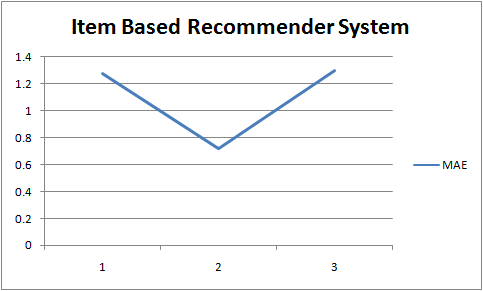
 



## Running the Code: 

1. In the folder, there are two files, main.py and Recommender.py.
  > Excute first main.py and after it Recommender.py to get expected MAE.
2. After running main.py two CSV Files are generated based on givn data set as Train.csv and Test.csv.
3. These two files are used in Recommender.py as input to train Item-based Recommender System  and test it with the test.csv data set.


Note: During the execution an warning will be displayed. This can be ignored. Its a warning that indicates non-scalar multiplcations. 
> {Warning (from warnings module):
  File "C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py", line 3175
    c = cov(x, y, rowvar)
RuntimeWarning: Degrees of freedom <= 0 for slice
Warning (from warnings module):
  File "C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py", line 3109
    c *= 1. / np.float64(fact)
RuntimeWarning: divide by zero encountered in double_scalars} 




